In [1]:
import sqlite3
import random
import itertools
import subprocess
import os
import shlex
import time
import pickle

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# filename = "predictions_100k.txt"
filename = "/home/rte/re-imaging/visualisation/predictions_1m.txt"
predictions = []

with open(filename) as f:
    for line in f:
        substrings = line.split(",")
        predictions.append(substrings)
print(len(predictions))
print(predictions[0])

1000000
['2971229', 'slide_rule', '0.9124399', 'rule', '0.027528005', 'scale', '0.026591081', 'oscilloscope', '0.0075562373', 'magnetic_compass', '0.0064285034\n']


In [5]:
# get the first predictions from the bigger list

pred = []

for row in predictions:
    pred.append(row[1].split(".")[0])
print(len(pred))
print(pred[:5])

1000000
['slide_rule', 'web_site', 'rule', 'crane', 'rule']


In [6]:
print(pred)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
prediction = np.array(pred)

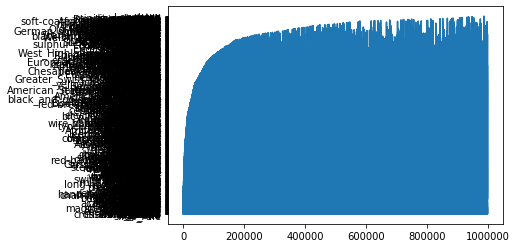

In [8]:
plt.plot(prediction)

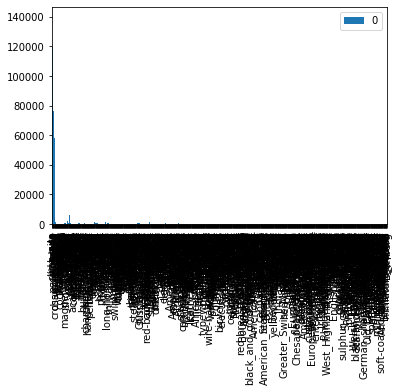

In [9]:
import pandas
from collections import Counter

class_counts = Counter(pred)
df = pandas.DataFrame.from_dict(class_counts, orient='index')
df.plot(kind='bar')

In [10]:
print(class_counts)

Counter({'oscilloscope': 139831, 'web_site': 119253, 'rule': 108069, 'slide_rule': 99055, 'envelope': 76602, 'menu': 57998, 'bow': 31836, 'crane': 26049, 'nematode': 24811, 'binder': 21055, 'spider_web': 16826, 'swing': 12657, 'maze': 12262, 'jigsaw_puzzle': 10526, 'hook': 10410, 'crossword_puzzle': 10406, 'wall_clock': 9820, 'analog_clock': 8215, 'stupa': 6238, 'scale': 6051, 'necklace': 5954, 'syringe': 5263, 'chime': 5234, 'pole': 4506, 'screwdriver': 4496, 'tripod': 3847, 'shower_curtain': 3748, 'magnetic_compass': 3703, 'traffic_light': 3000, 'nail': 2817, 'window_screen': 2800, 'chain': 2689, 'whistle': 2437, 'digital_clock': 2255, 'switch': 2106, 'safety_pin': 2020, 'gong': 1995, 'harvestman': 1956, 'bubble': 1942, 'fountain': 1843, 'parachute': 1773, 'handkerchief': 1722, 'book_jacket': 1702, 'picket_fence': 1690, 'matchstick': 1634, 'chainlink_fence': 1554, 'solar_dish': 1472, 'abacus': 1441, 'microphone': 1417, 'spotlight': 1409, 'coil': 1321, 'jellyfish': 1314, 'pinwheel': 1

In [11]:
plist = []
for key, val in class_counts.items():
    print(key,val)
    plist.append([key, val])

slide_rule 99055
web_site 119253
rule 108069
crane 26049
envelope 76602
oscilloscope 139831
mouse 710
menu 57998
crossword_puzzle 10406
maze 12262
chainlink_fence 1554
screwdriver 4496
ballpoint 551
vizsla 65
knot 389
swing 12657
digital_clock 2255
poncho 326
wool 216
baseball 80
picket_fence 1690
necklace 5954
harvestman 1956
plate_rack 1175
cocktail_shaker 55
Windsor_tie 557
cassette 370
velvet 268
dumbbell 232
binder 21055
spider_web 16826
bow 31836
nematode 24811
jellyfish 1314
hair_slide 1155
bow_tie 643
pick 1011
umbrella 896
magnetic_compass 3703
Band_Aid 491
shower_curtain 3748
coil 1321
lighter 351
swab 739
scale 6051
bubble 1942
croquet_ball 457
parachute 1773
bee_eater 627
electric_fan 603
Boston_bull 9
stupa 6238
harp 280
strainer 445
prison 552
tripod 3847
face_powder 400
tick 201
parallel_bars 222
hook 10410
balloon 1157
academic_gown 87
piggy_bank 100
ski 876
container_ship 500
wall_clock 9820
jigsaw_puzzle 10526
nail 2817
pole 4506
bonnet 313
wardrobe 1071
abacus 1441
j

In [12]:
print(len(plist))
print(plist)

980
[['slide_rule', 99055], ['web_site', 119253], ['rule', 108069], ['crane', 26049], ['envelope', 76602], ['oscilloscope', 139831], ['mouse', 710], ['menu', 57998], ['crossword_puzzle', 10406], ['maze', 12262], ['chainlink_fence', 1554], ['screwdriver', 4496], ['ballpoint', 551], ['vizsla', 65], ['knot', 389], ['swing', 12657], ['digital_clock', 2255], ['poncho', 326], ['wool', 216], ['baseball', 80], ['picket_fence', 1690], ['necklace', 5954], ['harvestman', 1956], ['plate_rack', 1175], ['cocktail_shaker', 55], ['Windsor_tie', 557], ['cassette', 370], ['velvet', 268], ['dumbbell', 232], ['binder', 21055], ['spider_web', 16826], ['bow', 31836], ['nematode', 24811], ['jellyfish', 1314], ['hair_slide', 1155], ['bow_tie', 643], ['pick', 1011], ['umbrella', 896], ['magnetic_compass', 3703], ['Band_Aid', 491], ['shower_curtain', 3748], ['coil', 1321], ['lighter', 351], ['swab', 739], ['scale', 6051], ['bubble', 1942], ['croquet_ball', 457], ['parachute', 1773], ['bee_eater', 627], ['electr

In [13]:
def takeSecond(elem):
    return elem[1]

plist.sort(key=takeSecond, reverse=True)

In [14]:
# write the data to a file
# org_file = "top_predictions_random_100k.org"
org_file = "top_predictions_random_1m.org"
with open(org_file, "w+") as write_file:
    print("* ", file=write_file)
#         joined = list(zip(cat[1], cat[2]))
    #     print(joined)
    print("|-|-|", file=write_file)
    for line in plist:
        print('|' + str(line[0]) + "|" + str(line[1]) + "|", file=write_file)
    print("|-|-|", file=write_file)
write_file.close()